
# Importing the libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Importing the dataset


In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Feature Scaling


In [ ]:

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


# Fitting Logistic Regression to the Training set


In [ ]:

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)


# Predicting the Test set results


In [ ]:

y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)



# Making the Confusion Matrix


In [ ]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train) # train and its predict
cm = confusion_matrix(y_test, y_pred) # test and its predict
print(cm_train)
print(cm)

[[172  17]
 [ 36  75]]
[[65  3]
 [ 8 24]]


The count of true negatives is C0,0, false negatives is C1,0, true positives is C1,1 and false positives is C0,1.

#Visualization

(592, 616) (592, 616)


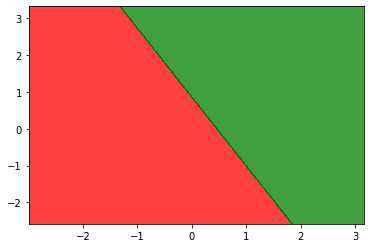

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
            np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
print(X1.shape, X2.shape)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


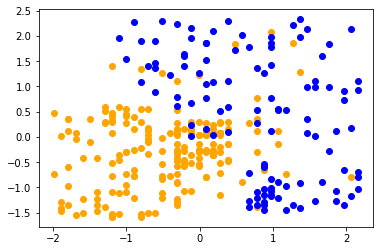

In [19]:
X_set, y_set = X_train, y_train
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('orange', 'blue'))(i), label = j)
